In [78]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import re 
import nltk 
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score,confusion_matrix,classification_report


In [79]:
train=pd.read_csv(r"C:\Users\asifk\Desktop\NLP_kaggle\Corona_NLP_train.csv",encoding='latin1')
test=pd.read_csv(r"C:\Users\asifk\Desktop\NLP_kaggle\Corona_NLP_test.csv",encoding='latin1')

In [80]:
x = train['OriginalTweet'].copy()
y = train['Sentiment'].copy()

In [81]:
x

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [82]:
encoding = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }

labels = ['Negative', 'Neutral', 'Positive']

           

y.replace(encoding, inplace=True)

In [83]:
def data_cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    tweet = re.sub('[^a-zA-Z]',' ',tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    
    #removing stop words
#     tweet = tweet.split()
    
    tweet=[word.lower() for word in tweet.split()]
    
    stop_words = stopwords.words('english')
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    return tweet
X= x.apply(lambda x : data_cleaner(x))


In [84]:
X

0                             menyrbie phil gahan chrisitv
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please panic enough food ...
4        ready go supermarket covid outbreak paranoid f...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid relat...
41154    know getting tough kameronwilds rationing toil...
41155    wrong smell hand sanitizer starting turn coron...
41156    tartiicat well new used rift going amazon rn a...
Name: OriginalTweet, Length: 41157, dtype: object

In [85]:
from nltk.stem import WordNetLemmatizer


w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


X = X.apply(lemmatize_text)

In [86]:
y

0        1
1        2
2        2
3        2
4        0
        ..
41152    1
41153    0
41154    2
41155    1
41156    0
Name: Sentiment, Length: 41157, dtype: int64

In [87]:
X

0                        [menyrbie, phil, gahan, chrisitv]
1        [advice, talk, neighbour, family, exchange, ph...
2        [coronavirus, australia, woolworth, give, elde...
3        [food, stock, one, empty, please, panic, enoug...
4        [ready, go, supermarket, covid, outbreak, para...
                               ...                        
41152    [airline, pilot, offering, stock, supermarket,...
41153    [response, complaint, provided, citing, covid,...
41154    [know, getting, tough, kameronwilds, rationing...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [tartiicat, well, new, used, rift, going, amaz...
Name: OriginalTweet, Length: 41157, dtype: object

In [88]:
X=[" ".join(review) for review in X.values]

In [89]:
X

['menyrbie phil gahan chrisitv',
 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order',
 'coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid outbreak',
 'food stock one empty please panic enough food everyone take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral',
 'ready go supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement',
 'news region first confirmed covid case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report',
 'cashier grocery store sharing insight covid prove credibility commented civics class know talking',
 'supermarket today buy toilet pa

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=10000)    

tfidf = count_vectorizer.fit_transform(X)

len(count_vectorizer.get_feature_names())

10000

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.20)

# Navie bayes Classifier 


In [92]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics

In [93]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [94]:
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred)
print(cm)

accuracy:   0.672
[[2214   42  854]
 [ 410  226  917]
 [ 453   24 3092]]


# Random Forest Classifier 

In [95]:
rfc=RandomForestClassifier(random_state=0)

In [96]:
 param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [20],
    'criterion' :['gini', 'entropy']
 }

In [29]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3,n_jobs = -1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [98]:
# CV_rfc.best_params_

In [99]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, criterion='gini',n_jobs = -1)

In [100]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

In [101]:
r_pred=rfc1.predict(X_test)

In [102]:
print("Accuracy for Random Forest : ",accuracy_score(y_test,r_pred))

Accuracy for Random Forest :  0.7190233236151603


In [103]:
cm3=confusion_matrix(y_test, r_pred)
print (cm3)

[[2183  307  620]
 [ 247  921  385]
 [ 482  272 2815]]


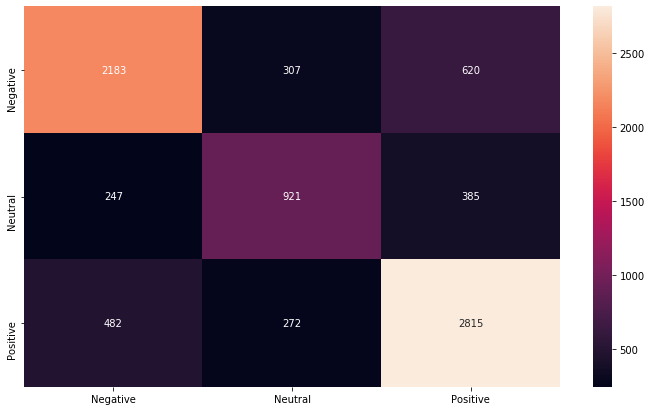

In [104]:
conf = confusion_matrix(y_test, r_pred)


cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

## testing the model on new data

In [105]:
X_test = test['OriginalTweet'].copy()
y_test = test['Sentiment'].copy()

In [106]:
encoding = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }

labels = ['Negative', 'Neutral', 'Positive']

           

y_test.replace(encoding, inplace=True)

In [107]:
X_test= X_test.apply(lambda X_test : data_cleaner(X_test))

In [108]:
X_test

0       trending new yorkers encounter empty supermark...
1       find hand sanitizer fred meyer turned amazon p...
2                     find protect loved ones coronavirus
3       panic buying hits newyork city anxious shopper...
4       toiletpaper dunnypaper coronavirus coronavirus...
                              ...                        
3793    meanwhile supermarket israel people dance sing...
3794    panic buy lot non perishable items echo needs ...
3795    asst prof economics cconces nbcphiladelphia ta...
3796    gov need somethings instead biar je rakyat ass...
3797    forestandpaper members committed safety employ...
Name: OriginalTweet, Length: 3798, dtype: object

In [109]:
X_test = X_test.apply(lemmatize_text)

In [110]:
X_test=[" ".join(review) for review in X_test.values]

In [111]:
tfidf = count_vectorizer.fit_transform(X_test)

In [112]:
r_pred_test=rfc1.predict(tfidf)

In [113]:
print("Accuracy for Random Forest : ",accuracy_score(y_test,r_pred_test))

Accuracy for Random Forest :  0.22169562927856767


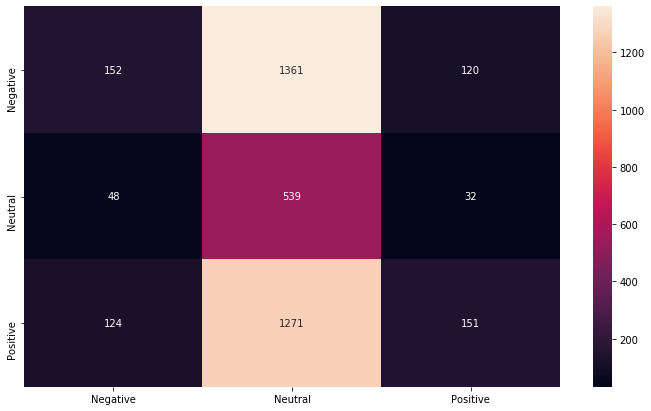

In [114]:
conf = confusion_matrix(y_test,r_pred_test)


cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [115]:
print(classification_report(y_test,r_pred_test))

              precision    recall  f1-score   support

           0       0.47      0.09      0.16      1633
           1       0.17      0.87      0.28       619
           2       0.50      0.10      0.16      1546

    accuracy                           0.22      3798
   macro avg       0.38      0.35      0.20      3798
weighted avg       0.43      0.22      0.18      3798

